In [6]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# PREPROCESSING (ANDREW)

In [7]:
df = pd.read_csv('Andrew.csv')
df.columns

Index(['Date', 'Treatment', 'Day', 'Time', 'Engaged', 'Relevant', 'Attitude'], dtype='object')

In [8]:
df_1A = df[df['Treatment'] == '1A']
df_1B = df[df['Treatment'] == '1B']
df_2A = df[df['Treatment'] == '2A']
df_2B = df[df['Treatment'] == '2B']

In [9]:
# Replace values of row 17 with averages of other days
df_2A

,Date,Treatment,Day,Time,Engaged,Relevant,Attitude
14,11/4,2A,1,138,4,5,4
15,11/5,2A,2,64,2,2,3
16,11/6,2A,3,64,3,3,4
17,11/7,2A,4,-1,-1,-1,-1
18,11/8,2A,5,43,3,3,3
19,11/9,2A,6,7,3,2,3
20,11/10,2A,7,53,4,4,4


In [10]:
df_2A.loc[17] = ['11/7', '2A', 4, 62, 3, 3, 4]
df_2A

,Date,Treatment,Day,Time,Engaged,Relevant,Attitude
14,11/4,2A,1,138,4,5,4
15,11/5,2A,2,64,2,2,3
16,11/6,2A,3,64,3,3,4
17,11/7,2A,4,62,3,3,4
18,11/8,2A,5,43,3,3,3
19,11/9,2A,6,7,3,2,3
20,11/10,2A,7,53,4,4,4


In [11]:
def preprocess(df):
    data = df.copy(deep=True)
    data['cumulative_time'] = data['Time'].cumsum()
    data['average_mood'] = (data['Engaged'] + data['Relevant'] + data['Attitude']) / 3
    return data

In [12]:
df_1A = preprocess(df_1A)
df_1B = preprocess(df_1B)
df_2A = preprocess(df_2A)
df_2B = preprocess(df_2B)

In [13]:
df_1A.describe()

,Day,Time,Engaged,Relevant,Attitude,cumulative_time,average_mood
count,7.000000,7.000000,7.000000,7.0,7.000000,7.000000,7.000000
mean,4.000000,61.857143,4.285714,4.0,4.285714,277.714286,4.190476
std,2.160247,24.545390,0.487950,1.0,0.755929,126.654009,0.690066
min,1.000000,31.000000,4.000000,3.0,3.000000,97.000000,3.333333
25%,2.500000,41.000000,4.000000,3.0,4.000000,187.000000,3.666667
50%,4.000000,70.000000,4.000000,4.0,4.000000,278.000000,4.000000
75%,5.500000,76.500000,4.500000,5.0,5.000000,381.000000,4.833333
max,7.000000,97.000000,5.000000,5.0,5.000000,433.000000,5.000000


In [14]:
df_1B.describe()

,Day,Time,Engaged,Relevant,Attitude,cumulative_time,average_mood
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,4.000000,26.428571,2.857143,2.428571,3.000000,94.714286,2.761905
std,2.160247,15.414897,1.573592,1.272418,0.816497,59.748680,1.197440
min,1.000000,5.000000,1.000000,1.000000,2.000000,23.000000,1.333333
25%,2.500000,16.500000,1.500000,1.500000,2.500000,46.000000,1.833333
50%,4.000000,23.000000,3.000000,2.000000,3.000000,94.000000,2.666667
75%,5.500000,38.000000,4.000000,3.500000,3.500000,134.500000,3.666667
max,7.000000,48.000000,5.000000,4.000000,4.000000,185.000000,4.333333


In [15]:
df_2A.describe()

,Day,Time,Engaged,Relevant,Attitude,cumulative_time,average_mood
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,4.000000,61.571429,3.142857,3.142857,3.571429,302.000000,3.285714
std,2.160247,39.263457,0.690066,1.069045,0.534522,104.917428,0.705234
min,1.000000,7.000000,2.000000,2.000000,3.000000,138.000000,2.333333
25%,2.500000,48.000000,3.000000,2.500000,3.000000,234.000000,2.833333
50%,4.000000,62.000000,3.000000,3.000000,4.000000,328.000000,3.333333
75%,5.500000,64.000000,3.500000,3.500000,4.000000,374.500000,3.666667
max,7.000000,138.000000,4.000000,5.000000,4.000000,431.000000,4.333333


In [16]:
df_2B.describe()

,Day,Time,Engaged,Relevant,Attitude,cumulative_time,average_mood
count,7.000000,7.000000,7.000000,7.000000,7.0,7.00000,7.000000
mean,4.000000,38.714286,3.142857,2.857143,3.0,104.00000,3.000000
std,2.160247,30.798887,1.345185,1.463850,1.0,95.79318,1.201850
min,1.000000,4.000000,1.000000,1.000000,2.0,4.00000,1.666667
25%,2.500000,19.500000,2.500000,2.000000,2.0,39.00000,2.000000
50%,4.000000,31.000000,3.000000,2.000000,3.0,77.00000,2.666667
75%,5.500000,57.500000,4.000000,4.000000,4.0,149.00000,4.000000
max,7.000000,82.000000,5.000000,5.000000,4.0,271.00000,4.666667


# Analysis

In [17]:
df_1A.columns

Index(['Date', 'Treatment', 'Day', 'Time', 'Engaged', 'Relevant', 'Attitude',
       'cumulative_time', 'average_mood'],
      dtype='object')

-----
We will first analyze the significance level of beta to determine whether or not we want to look at the averages or linear relationships of each dataframe. We will use a significance level of 0.05 for \* and 0.01 for \*\*

In [18]:
smf.ols('Time ~ Day', data=df_1A).fit().summary()

C:\Users\super\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Time   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     3.993
Date:                Mon, 02 Dec 2024   Prob (F-statistic):              0.102
Time:                        20:00:25   Log-Likelihood:                -29.742
No. Observations:                   7   AIC:                             63.48
Df Residuals:                       5   BIC:                             63.38
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     92.1429     16.944      5.438      0.003      48.587     135.699
Day           -7.5714      3.789     -1.998      0.102     -17.311       2.168
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.879
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.115
Skew:                          -0.074   Prob(JB):                        0.944
Kurtosis:                       2.388   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
# Drop the extreme lower outlier for Day 6
smf.ols('Time ~ Day', data=df_1B[df_1B['Day'] != 6]).fit().summary()

C:\Users\super\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Time   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     13.91
Date:                Mon, 02 Dec 2024   Prob (F-statistic):             0.0203
Time:                        20:00:25   Log-Likelihood:                -19.015
No. Observations:                   6   AIC:                             42.03
Df Residuals:                       4   BIC:                             41.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.0429      6.076      1.653      0.174      -6.826      26.911
Day            5.4429      1.459      3.730      0.020       1.391       9.495
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.158
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.527
Skew:                          -0.084   Prob(JB):                        0.768
Kurtosis:                       1.557   Cond. No.                         9.19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
# Drop the extreme upper outlier for Day 1
smf.ols('Time ~ Day', data=df_2A[df_2A['Day'] != 1]).fit().summary()

C:\Users\super\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Time   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     2.175
Date:                Mon, 02 Dec 2024   Prob (F-statistic):              0.214
Time:                        20:00:25   Log-Likelihood:                -25.229
No. Observations:                   6   AIC:                             54.46
Df Residuals:                       4   BIC:                             54.04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     80.3333     22.848      3.516      0.025      16.898     143.769
Day           -7.0000      4.747     -1.475      0.214     -20.180       6.180
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.452
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.592
Skew:                          -0.767   Prob(JB):                        0.744
Kurtosis:                       2.878   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
smf.ols('Time ~ Day', data=df_2B).fit().summary()

C:\Users\super\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Time   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     19.42
Date:                Mon, 02 Dec 2024   Prob (F-statistic):            0.00697
Time:                        20:00:25   Log-Likelihood:                -27.834
No. Observations:                   7   AIC:                             59.67
Df Residuals:                       5   BIC:                             59.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -12.1429     12.902     -0.941      0.390     -45.307      21.022
Day           12.7143      2.885      4.407      0.007       5.299      20.130
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.004
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.621
Skew:                          -0.510   Prob(JB):                        0.733
Kurtosis:                       1.956   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Beta for 1A and 2A are not significant (>0.05). 1B is \*. and 2B is \*\*. As such, we will represent A treatments using its mean while we will represent B treatments using its linear regression.

-----

In [34]:
def side_by_side(x, y, ylim):
    # Configure plt layout
    plt.clf()
    fig, axes = plt.subplots(1, 4, figsize=(15, 3))
    
    for ax in axes.flat:
        ax.set_ylim(top=ylim)

    # Plot 1A
    sns.scatterplot(data=df_1A, x=x, y=y, ax=axes[0])
    axes[0].axhline(y=df_1A[y].mean(), color='r', linestyle='--')
    
    # Plot 1B (Drop outlier on Day 6)
    sns.regplot(data=df_1B[df_1B['Day'] != 6], x=x, y=y, ax=axes[1])
    axes[1].plot(df_1B[df_1B['Day'] == 6][x], df_1B[df_1B['Day'] == 6][y], 'ro')

    # Plot 2A
    sns.scatterplot(data=df_2A, x=x, y=y, ax=axes[2])
    axes[2].axhline(y=df_2A[y].mean(), color='r', linestyle='--')

    # Plot 2B
    sns.regplot(data=df_2B, x=x, y=y, ax=axes[3])

    # Configure plt display
    plt.tight_layout()
    plt.show()

<Figure size 640x480 with 0 Axes>

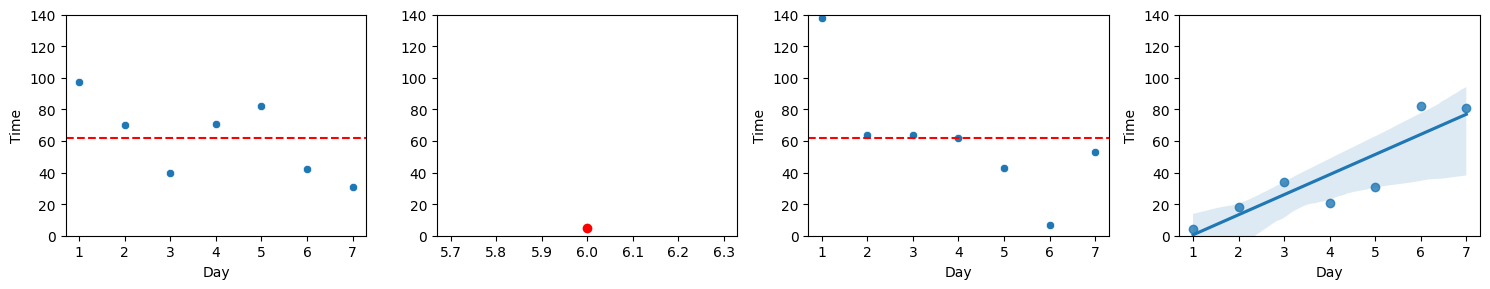

In [35]:
side_by_side('Day', 'Time', 140)

<Figure size 640x480 with 0 Axes>

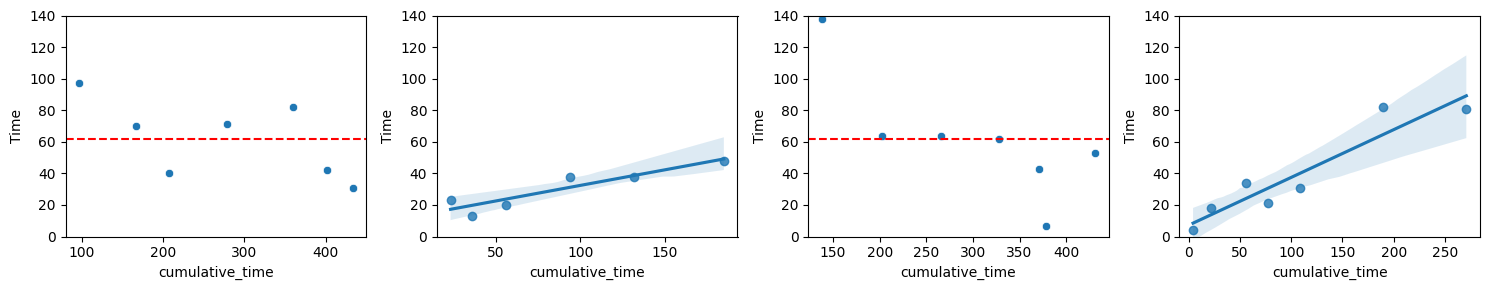

In [ ]:
side_by_side('cumulative_time', 'Time', 140)

<Figure size 640x480 with 0 Axes>

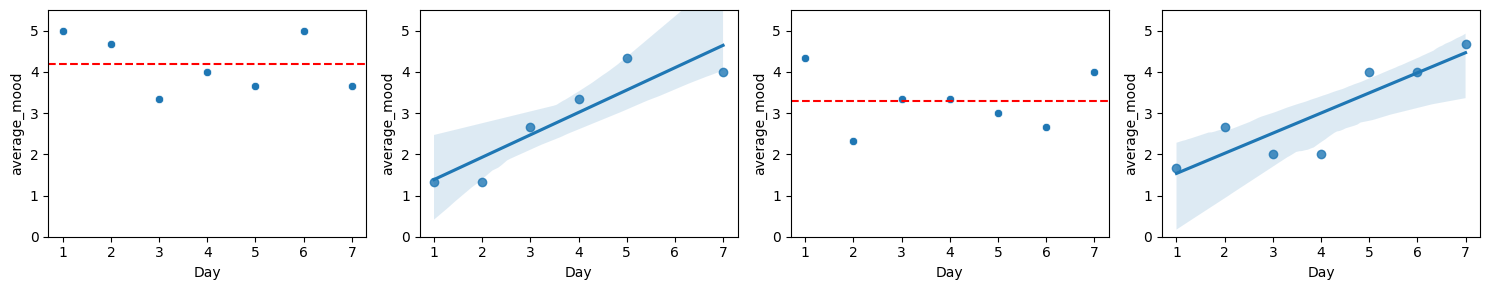

In [ ]:
side_by_side('Day', 'average_mood', 5.5)

<Figure size 640x480 with 0 Axes>

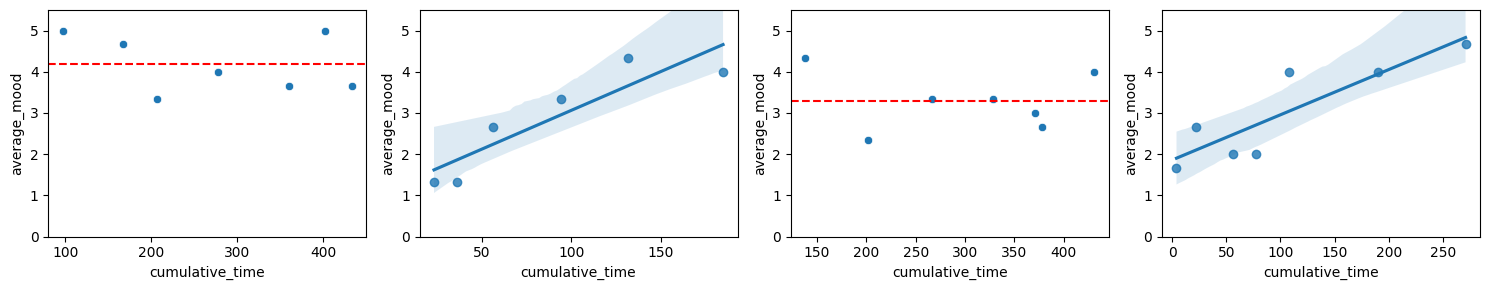

In [ ]:
side_by_side('cumulative_time', 'average_mood', 5.5)

<Figure size 640x480 with 0 Axes>

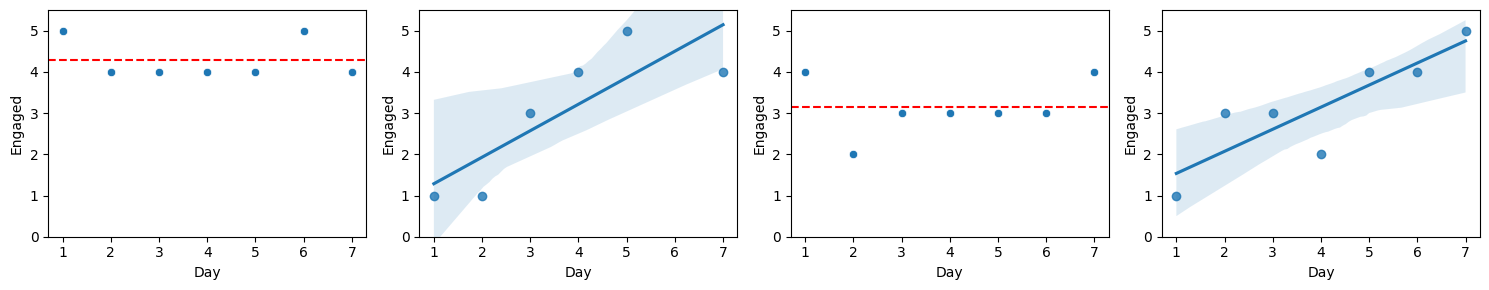

In [ ]:
side_by_side('Day', 'Engaged', 5.5)

<Figure size 640x480 with 0 Axes>

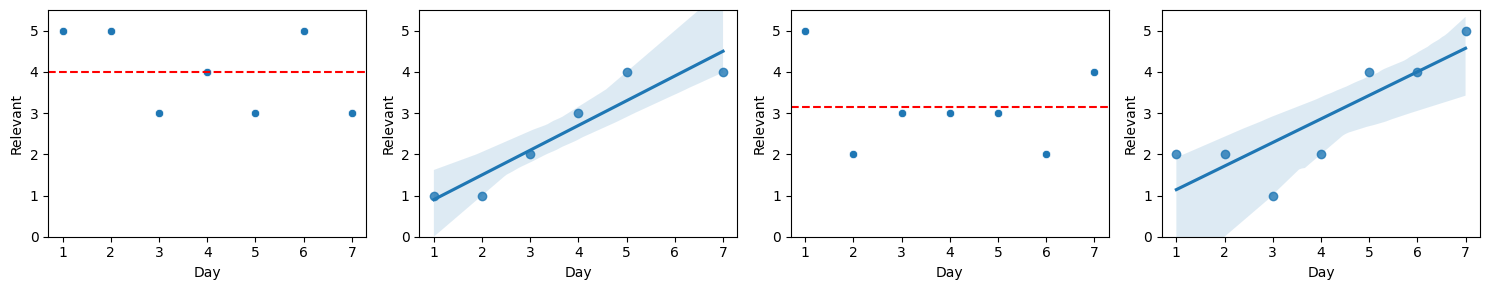

In [ ]:
side_by_side('Day', 'Relevant', 5.5)

<Figure size 640x480 with 0 Axes>

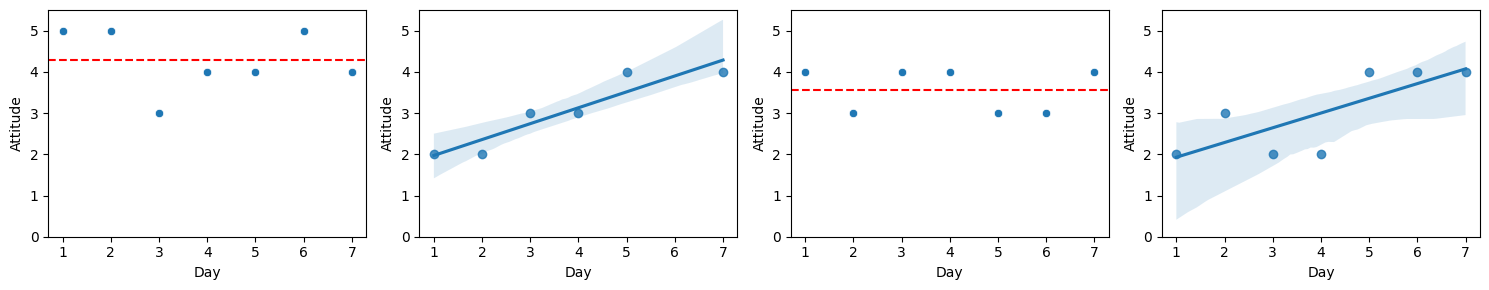

In [ ]:
side_by_side('Day', 'Attitude', 5.5)

In [ ]:
df[['Engaged', 'Relevant', 'Attitude']].corr()

,Engaged,Relevant,Attitude
Engaged,1.000000,0.887984,0.88993
Relevant,0.887984,1.000000,0.91784
Attitude,0.889930,0.917840,1.00000
